<a href="https://colab.research.google.com/github/183hardik/Portfolio-Management/blob/main/Portfolio_Optimization_using_Markowitz_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

IMPORTING NECESSARY LIBRARIES

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
sns.set_style("whitegrid")

DEFINING BASIC VARIABLES

Choosing 5 high performing stocks from different sectors so that there is as little correlation between them as possible

In [ ]:
NUM_TRADING_DAYS = 252

NUM_SIMULATIONS = 100000

stocks = ["GHCL.NS","HDFCBANK.NS","TATAMOTORS.NS","NH.NS","EMAMILTD.NS"]

start_date = "2015-10-01"
end_date = "2023-10-01"


PULLING THE DATA AND FORMING A DATABASE

In [ ]:
stock_data = {}

for stock in stocks:
    ticker = yf.Ticker(stock)
    stock_data[stock] = ticker.history(start = start_date, end = end_date)['Close']

stock_prices = pd.DataFrame(stock_data)

stock_prices

,GHCL.NS,HDFCBANK.NS,TATAMOTORS.NS,NH.NS,EMAMILTD.NS
Date,,,,,
2015-10-01 00:00:00+05:30,115.294250,504.316406,296.704712,NaN,515.869934
2015-10-05 00:00:00+05:30,117.766022,518.817932,314.043610,NaN,533.150818
2015-10-06 00:00:00+05:30,116.676750,512.960632,332.528534,NaN,513.712769
2015-10-07 00:00:00+05:30,117.388969,513.810913,340.151672,NaN,517.565125
2015-10-08 00:00:00+05:30,114.372543,511.614441,342.045013,NaN,512.369629
...,...,...,...,...,...
2023-09-25 00:00:00+05:30,617.849976,1531.000000,618.700012,1062.050049,506.480377
2023-09-26 00:00:00+05:30,620.549988,1537.650024,619.799988,1067.800049,511.299744
2023-09-27 00:00:00+05:30,622.150024,1526.849976,620.150024,1081.900024,503.578857


CALCULATING LOG-RETURNS AND ADDING THAT DATA

In [ ]:
log_returns =  np.log(stock_prices / stock_prices.shift(1))

log_returns = log_returns[1:]


CALCULATING AVERAGE ANNUAL RETURNS

In [ ]:
print(log_returns.mean()*NUM_TRADING_DAYS)

GHCL.NS          0.213833
HDFCBANK.NS      0.141370
TATAMOTORS.NS    0.096166
NH.NS            0.155791
EMAMILTD.NS      0.003352
dtype: float64


CALCULATING ANNUAL VOLATILITY

In [ ]:
print(log_returns.std()*np.sqrt(NUM_TRADING_DAYS))

GHCL.NS          0.411738
HDFCBANK.NS      0.232107
TATAMOTORS.NS    0.437710
NH.NS            0.316831
EMAMILTD.NS      0.323176
dtype: float64


## GENERATING RANDOM WEIGHTS AND CHECKING THE RETURN, RISKS ASSOCIATED WITH THEM

In [ ]:
portfolio_weights = []
portfolio_returns = []
portfolio_risks = []


for i in range(NUM_SIMULATIONS):
    w = np.random.rand(log_returns.shape[1])
    w /= np.sum(w)
        #create an array of weights for a portfolio (use np.random.random)
                                  #weights for each stock should be fractional
    portfolio_weights.append(w)
    port_return = np.sum(log_returns.mean()*w)*NUM_TRADING_DAYS
    portfolio_returns.append(port_return)
    port_risk = np.sqrt(np.dot(w.T,np.dot(log_returns.cov()*NUM_TRADING_DAYS,w)))
    portfolio_risks.append(port_risk)

In [ ]:
risk_free_rate = 0.07

CREATING THE DATAFRAME FOR WEIGHTS,RETURNS AND RISKS [basically all the different portfolios]

In [ ]:
porfolio_weights = np.array(portfolio_weights)
portfolio_returns = np.array(portfolio_returns)
portfolio_risks = np.array(portfolio_risks)
print(portfolio_returns[:8])
sharpe_ratios  = (portfolio_returns - 0.07)/   portfolio_returns.std()              # use the above variables and the formula for sharpe ratio
portfolios = pd.DataFrame({"Return": portfolio_returns,"Risk": portfolio_risks,"Sharpe": sharpe_ratios })

[0.12194243 0.11987362 0.1257204  0.11387144 0.11641959 0.10313992
 0.12159586 0.12167489]


In [ ]:
portfolios

,Return,Risk,Sharpe
0,0.121942,0.274022,2.617113
1,0.119874,0.243671,2.512876
2,0.125720,0.229745,2.807466
3,0.113871,0.224280,2.210457
4,0.116420,0.229661,2.338846
...,...,...,...
99995,0.121458,0.204050,2.592695
99996,0.102720,0.200017,1.648616
99997,0.135834,0.338391,3.317045
99998,0.084626,0.225070,0.736953


Plotting it

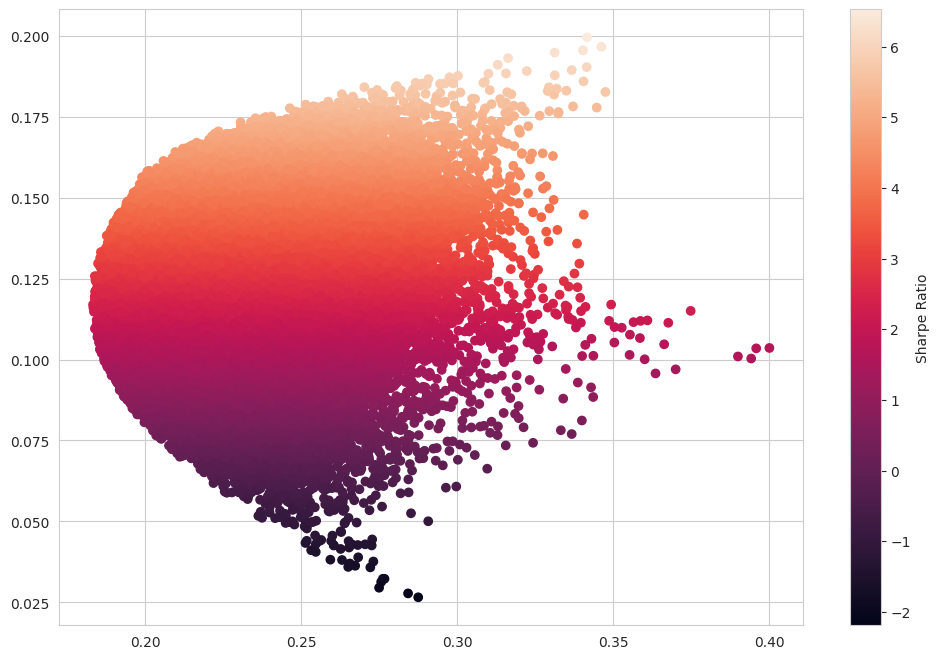

In [ ]:
plt.figure(figsize=(12,8))
plt.scatter(portfolio_risks,portfolio_returns,c = sharpe_ratios, marker="o")
plt.grid(True)
plt.xlabel = ("Expected Risk")
plt.ylabel = ("Expected Return")
plt.colorbar(label = "Sharpe Ratio")

plt.show()

THE CURVE IS ALMOST A PERFECT HYPERBOLA!

This is also called the "Markowitz Bullet"

The upper part of the curve is referred to as the "Efficient Frontier"


The efficient frontier is the set of optimal portfolios that offer the highest expected return for a defined level of risk or the lowest risk for a given level of expected return. Portfolios that lie below the efficient frontier are sub-optimal because they do not provide enough return for the level of risk.

First let's find out the Portfolio with the maximum Sharpe Ratio

In [ ]:

ind = 0

for i in range(len(sharpe_ratios)):
    if(sharpe_ratios[i] == np.amax(sharpe_ratios)):
        ind = i

In [ ]:
print("Maximum Sharpe Ratio = ",sharpe_ratios[ind])
print("Corresponding Return =  ",portfolio_returns[ind])
print("Corresponding Risk =  ",portfolio_risks[ind])

Maximum Sharpe Ratio =  6.528079343146251
Corresponding Return =   0.19956424058648353
Corresponding Risk =   0.34163142787472045


SO HERE WE HAVE OUR MAX SHARPE RATIO PORTFOLIO

In [ ]:
for i in range(len(stocks)):
    print(stocks[i], ':', portfolio_weights[ind][i])

GHCL.NS : 0.7946795046269194
HDFCBANK.NS : 0.08649421322786785
TATAMOTORS.NS : 0.0045931720716903685
NH.NS : 0.10878395629645893
EMAMILTD.NS : 0.005449153777063523


Plotting the point of our portfolio with max sharpe

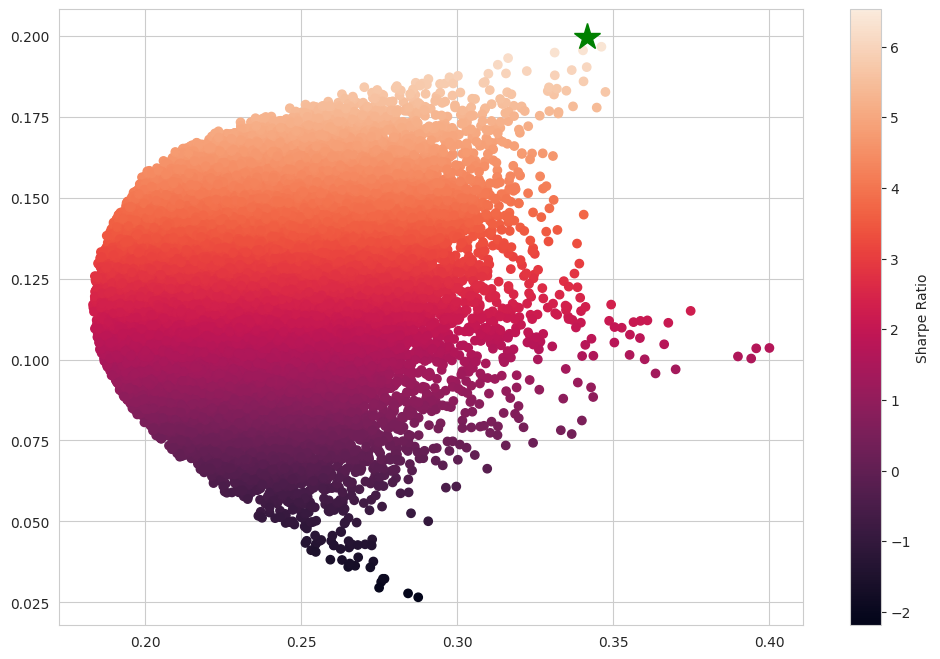

In [ ]:
plt.figure(figsize=(12,8))
plt.scatter(portfolio_risks,portfolio_returns,c = sharpe_ratios, marker="o")
plt.grid(True)
plt.xlabel = ("Expected Risk")
plt.ylabel = ("Expected Return")
plt.colorbar(label = "Sharpe Ratio")
plt.plot(portfolio_risks[ind],portfolio_returns[ind], 'g*',markersize = 20.0)


plt.show()

Now let's make a minimum risk portfolio

In [ ]:
ind = 0
for i in range(len(portfolio_risks)):
   if(portfolio_risks[i] == np.amin(portfolio_risks)):
        ind = i
                                    #get the index of the minimum risk portfolio

In [ ]:
print("Minimum Risk = ",portfolio_risks[ind])
print("Corresponding Return =  ",portfolio_returns[ind])

Minimum Risk =  0.18326781328205105
Corresponding Return =   0.11696122546005569


In [ ]:
for i in range(len(stocks)):
    print(stocks[i], ':', portfolio_weights[ind][i])

GHCL.NS : 0.06943802047046667
HDFCBANK.NS : 0.44895872416133104
TATAMOTORS.NS : 0.0025780072844829444
NH.NS : 0.24134424876440538
EMAMILTD.NS : 0.23768099931931402


As we can see, this portfolio is very very different

Also we can see our calculations show us the basics of finance, when the risk is less, the returns are less

Plotting the point of our portfolio with minimum risk

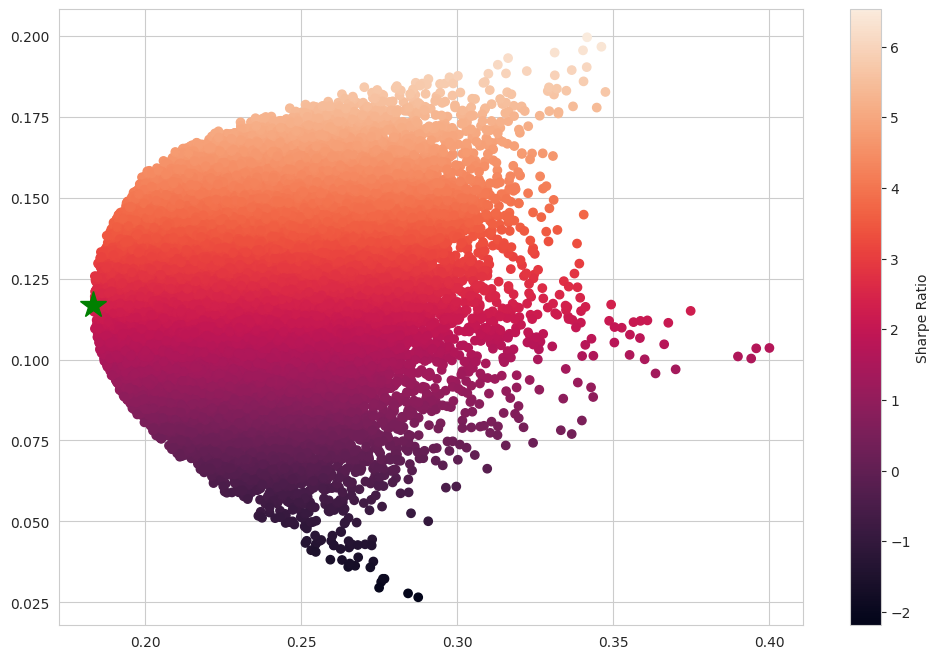

In [ ]:
plt.figure(figsize=(12,8))
plt.scatter(portfolio_risks,portfolio_returns,c = sharpe_ratios, marker="o")
plt.grid(True)
plt.xlabel = ("Expected Risk")
plt.ylabel = ("Expected Return")
plt.colorbar(label = "Sharpe Ratio")
plt.plot(portfolio_risks[ind],portfolio_returns[ind], 'g*',markersize = 20.0)


plt.show()

We can see the star is at the turning point of the hyperbola, as it signifies the point where the portfolio has least risk